In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [17]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Rejang/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

REJANG_VOWEL_SIGN_AI.png 1339599
REJANG_VIRAMA.png 1469550
REJANG_SECTION_MARK.png 8271897
REJANG_LETTER_YA.png 8149842
REJANG_LETTER_WA.png 7556157
REJANG_LETTER_TA.png 5824311
REJANG_LETTER_SA.png 8257473
REJANG_LETTER_RA.png 8786115
REJANG_LETTER_PA.png 4269351
REJANG_LETTER_NYJA.png 9999768
REJANG_VOWEL_SIGN_U.png 453843
REJANG_VOWEL_SIGN_O.png 1588596
REJANG_VOWEL_SIGN_I.png 624612
REJANG_VOWEL_SIGN_EU.png 705996
REJANG_VOWEL_SIGN_EA.png 1412124
REJANG_VOWEL_SIGN_E.png 968889
REJANG_VOWEL_SIGN_AU.png 679164
REJANG_LETTER_NYA.png 7759125
REJANG_LETTER_NGGA.png 8973126
REJANG_LETTER_NGA.png 11875812
REJANG_LETTER_NDA.png 13033911
REJANG_LETTER_NA.png 10627392
REJANG_LETTER_MBA.png 7518597
REJANG_LETTER_MA.png 7558266
REJANG_LETTER_LA.png 8454717
REJANG_LETTER_KA.png 5157132
REJANG_LETTER_JA.png 7829223
REJANG_LETTER_HA.png 4886868
REJANG_LETTER_GA.png 4210527
REJANG_LETTER_DA.png 5817645
REJANG_LETTER_CA.png 6490137
REJANG_LETTER_BA.png 3314496
REJANG_LETTER_A.png 6557169
REJANG_CON

In [18]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [19]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Rejang/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

REJANG_VOWEL_SIGN_AI.png 1339599
REJANG_VIRAMA.png 1469550
REJANG_SECTION_MARK.png 8271897
REJANG_LETTER_YA.png 8149842
REJANG_LETTER_WA.png 7556157
REJANG_LETTER_TA.png 5824311
REJANG_LETTER_SA.png 8257473
REJANG_LETTER_RA.png 8786115
REJANG_LETTER_PA.png 4269351
REJANG_LETTER_NYJA.png 9999768
REJANG_VOWEL_SIGN_U.png 453843
REJANG_VOWEL_SIGN_O.png 1588596
REJANG_VOWEL_SIGN_I.png 624612
REJANG_VOWEL_SIGN_EU.png 705996
REJANG_VOWEL_SIGN_EA.png 1412124
REJANG_VOWEL_SIGN_E.png 968889
REJANG_VOWEL_SIGN_AU.png 679164
REJANG_LETTER_NYA.png 7759125
REJANG_LETTER_NGGA.png 8973126
REJANG_LETTER_NGA.png 11875812
REJANG_LETTER_NDA.png 13033911
REJANG_LETTER_NA.png 10627392
REJANG_LETTER_MBA.png 7518597
REJANG_LETTER_MA.png 7558266
REJANG_LETTER_LA.png 8454717
REJANG_LETTER_KA.png 5157132
REJANG_LETTER_JA.png 7829223
REJANG_LETTER_HA.png 4886868
REJANG_LETTER_GA.png 4210527
REJANG_LETTER_DA.png 5817645
REJANG_LETTER_CA.png 6490137
REJANG_LETTER_BA.png 3314496
REJANG_LETTER_A.png 6557169
REJANG_CON

In [5]:
import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Rejang/' + i) 

In [20]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [22]:
rejang = glob.glob("/content/drive/MyDrive/AKSARA/Rejang/*")

for huruf in rejang:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_AI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F9221D910>: 100%|██████████| 20/20 [00:00<00:00, 81.38 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VIRAMA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E99CB50>: 100%|██████████| 20/20 [00:00<00:00, 90.94 Samples/s] 


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_SECTION_MARK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0FA300EAC0>: 100%|██████████| 20/20 [00:00<00:00, 58.78 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F9221DBB0>: 100%|██████████| 20/20 [00:00<00:00, 57.36 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_WA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F922528B0>: 100%|██████████| 20/20 [00:00<00:00, 61.12 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9B1F10>: 100%|██████████| 20/20 [00:00<00:00, 62.46 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9ADA30>: 100%|██████████| 20/20 [00:00<00:00, 60.63 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9BD2B0>: 100%|██████████| 20/20 [00:00<00:00, 56.70 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9BD9A0>: 100%|██████████| 20/20 [00:00<00:00, 61.32 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_NYJA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9AD430>: 100%|██████████| 20/20 [00:00<00:00, 51.65 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9C16A0>: 100%|██████████| 20/20 [00:00<00:00, 89.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_O/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9ADE20>: 100%|██████████| 20/20 [00:00<00:00, 80.70 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9CFD90>: 100%|██████████| 20/20 [00:00<00:00, 83.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_EU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9AD8B0>: 100%|██████████| 20/20 [00:00<00:00, 91.43 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_EA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9CFAC0>: 100%|██████████| 20/20 [00:00<00:00, 85.37 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_E/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9CC100>: 100%|██████████| 20/20 [00:00<00:00, 108.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_AU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E99CCD0>: 100%|██████████| 20/20 [00:00<00:00, 78.85 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9D6AF0>: 100%|██████████| 20/20 [00:00<00:00, 58.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_NGGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F923E9EE0>: 100%|██████████| 20/20 [00:00<00:00, 58.67 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9D9B50>: 100%|██████████| 20/20 [00:00<00:00, 50.14 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_NDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9D2490>: 100%|██████████| 20/20 [00:00<00:00, 38.79 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9D6A00>: 100%|██████████| 20/20 [00:00<00:00, 54.71 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_MBA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9A1DC0>: 100%|██████████| 20/20 [00:00<00:00, 57.37 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E96E940>: 100%|██████████| 20/20 [00:00<00:00, 65.00 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E965FA0>: 100%|██████████| 20/20 [00:00<00:00, 48.64 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9CF7C0>: 100%|██████████| 20/20 [00:00<00:00, 62.22 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E9A1280>: 100%|██████████| 20/20 [00:00<00:00, 59.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E974DC0>: 100%|██████████| 20/20 [00:00<00:00, 54.61 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E974310>: 100%|██████████| 20/20 [00:00<00:00, 63.07 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E974310>: 100%|██████████| 20/20 [00:00<00:00, 61.69 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E97AAF0>: 100%|██████████| 20/20 [00:00<00:00, 61.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F92217730>: 100%|██████████| 20/20 [00:00<00:00, 75.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_LETTER_A/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E98D5E0>: 100%|██████████| 20/20 [00:00<00:00, 57.49 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_CONSONANT_SIGN_R/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E990310>: 100%|██████████| 20/20 [00:00<00:00, 83.45 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_CONSONANT_SIGN_NG/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E98DB20>: 100%|██████████| 20/20 [00:00<00:00, 76.36 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_CONSONANT_SIGN_N/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E981A30>: 100%|██████████| 20/20 [00:00<00:00, 77.88 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Rejang/REJANG_CONSONANT_SIGN_H/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F0F8E99AC70>: 100%|██████████| 20/20 [00:00<00:00, 70.87 Samples/s]


In [26]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Rejang/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [40]:
len(x)

777

In [41]:
len(set(y))

37

In [30]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x).astype(float)
y = np.asarray(y)

In [ ]:
y.shape

(2142,)

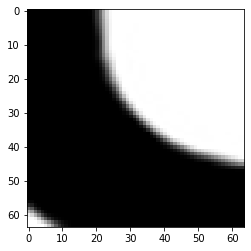

In [31]:
plt.imshow(x[200])

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(units = 37, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history = model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
311/311 [==============================] - 3s 8ms/step - loss: 2.1552 - accuracy: 0.4316 - val_loss: 0.4221 - val_accuracy: 0.8718
Epoch 2/20
311/311 [==============================] - 2s 7ms/step - loss: 0.2775 - accuracy: 0.9130 - val_loss: 0.2206 - val_accuracy: 0.8974
Epoch 3/20
311/311 [==============================] - 2s 7ms/step - loss: 0.1438 - accuracy: 0.9388 - val_loss: 0.1602 - val_accuracy: 0.9295
Epoch 4/20
311/311 [==============================] - 2s 7ms/step - loss: 0.1344 - accuracy: 0.9469 - val_loss: 0.1365 - val_accuracy: 0.9487
Epoch 5/20
311/311 [==============================] - 2s 7ms/step - loss: 0.1163 - accuracy: 0.9565 - val_loss: 0.1339 - val_accuracy: 0.9679
Epoch 6/20
311/311 [==============================] - 2s 7ms/step - loss: 0.0803 - accuracy: 0.9565 - val_loss: 0.1319 - val_accuracy: 0.9295
Epoch 7/20
311/311 [==============================] - 2s 7ms/step - loss: 0.0645 - accuracy: 0.9614 - val_loss: 0.1253 - val_accuracy: 0.9231
Epoch 

In [43]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
350/350 [==============================] - 3s 7ms/step - loss: 1.8374 - accuracy: 0.5122 - val_loss: 0.4329 - val_accuracy: 0.8590
Epoch 2/2
350/350 [==============================] - 2s 7ms/step - loss: 0.3278 - accuracy: 0.8755 - val_loss: 0.3043 - val_accuracy: 0.8462
-> 1
Epoch 1/2
350/350 [==============================] - 2s 7ms/step - loss: 0.2431 - accuracy: 0.9027 - val_loss: 0.2426 - val_accuracy: 0.9103
Epoch 2/2
350/350 [==============================] - 3s 7ms/step - loss: 0.1722 - accuracy: 0.9342 - val_loss: 0.2873 - val_accuracy: 0.8718
-> 2
Epoch 1/2
350/350 [==============================] - 3s 7ms/step - loss: 0.1527 - accuracy: 0.9356 - val_loss: 0.1743 - val_accuracy: 0.9359
Epoch 2/2
350/350 [==============================] - 2s 7ms/step - loss: 0.1376 - accuracy: 0.9399 - val_loss: 0.1568 - val_accuracy: 0.9487
-> 3
Epoch 1/2
350/350 [==============================] - 2s 7ms/step - loss: 0.1487 - accuracy: 0.9313 - val_loss: 0.2132 - val_accuracy: 

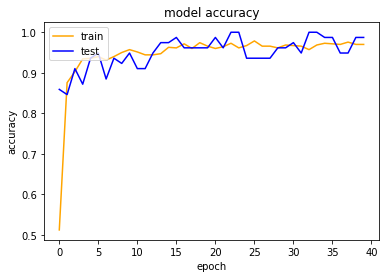

In [44]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

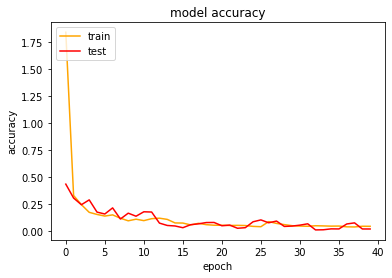

In [45]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
model.save_weights("Model_Rejang_FIX.h5")

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

25/25 [==============================] - 1s 25ms/step
0.972972972972973
[[21  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        21
          13   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
daftar_huruf[15]

'/content/drive/MyDrive/AKSARA/Rejang/REJANG_VOWEL_SIGN_E'

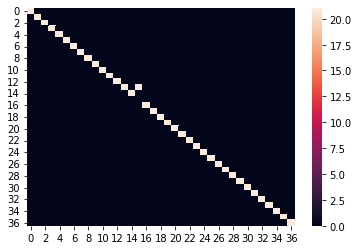

In [47]:
import seaborn as sns

sns.heatmap(cm)